In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
weather = pd.read_csv('Weather_data.csv',parse_dates =['datetime (UTC)'])
#weather = pd.read_csv('Weather_data.csv', parse_dates =['datetime (UTC)'], index_col = 'datetime (UTC)')
#weather2 = pd.read_csv('ERA5_Weather_Data_Monash.csv', parse_dates =['datetime (UTC)'], index_col = 'datetime (UTC)')
#weather.index.rename('Date Time', inplace=True)
weather.head()


,datetime (UTC),"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2010-01-01 00:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.26,16.39,2.60,101046.38,0.89,287.01,408.35,1.0
1,2010-01-01 01:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.67,16.29,2.91,101037.96,0.86,360.79,411.02,1.0
2,2010-01-01 02:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.16,15.89,3.26,101017.26,0.87,291.54,410.67,1.0
3,2010-01-01 03:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.46,15.33,3.17,101022.56,0.82,357.11,410.95,1.0
4,2010-01-01 04:00:00,"(-37.91, 145.13)",era5,69.59,10.0,18.53,15.11,2.95,100940.03,0.80,459.91,410.00,0.9


In [77]:

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100057 entries, 0 to 100056
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   datetime (UTC)                     100057 non-null  datetime64[ns]
 1   coordinates (lat,lon)              100057 non-null  object        
 2   model (name)                       100057 non-null  object        
 3   model elevation (surface)          100057 non-null  float64       
 4   utc_offset (hrs)                   100057 non-null  float64       
 5   temperature (degC)                 100057 non-null  float64       
 6   dewpoint_temperature (degC)        100057 non-null  float64       
 7   wind_speed (m/s)                   100057 non-null  float64       
 8   mean_sea_level_pressure (Pa)       100057 non-null  float64       
 9   relative_humidity ((0-1))          100057 non-null  float64       
 10  surface_solar_radiat

In [78]:
 weather = weather.rename(columns={'datetime (UTC)':'Date Time',
                                 'coordinates (lat,lon)':'coordinates',
                                  'model (name)':'model',
                                  'model elevation (surface)':'model elevation'
                                  ,'utc_offset (hrs)':'utc',
                                   'temperature (degC)':'T (degC)',
                                   'dewpoint_temperature (degC)':'Tdew (degC)',
                                   'wind_speed (m/s)':'wv (m/s)',
                                   'mean_sea_level_pressure (Pa)':'p (Pa)',
                                   'relative_humidity ((0-1))':'rh (%)',
                                   
                                  })
weather.drop(columns=['coordinates','model','model elevation','utc'], axis=1, inplace=True)

weather['p (Pa)'] = weather['p (Pa)'].apply(lambda x: x*0.01)
weather = weather.rename(columns={'p (Pa)':'p (mbar)'
                                  })

In [79]:
weather.head(100)

,Date Time,T (degC),Tdew (degC),wv (m/s),p (mbar),rh (%),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2010-01-01 00:00:00,18.26,16.39,2.60,1010.4638,0.89,287.01,408.35,1.00
1,2010-01-01 01:00:00,18.67,16.29,2.91,1010.3796,0.86,360.79,411.02,1.00
2,2010-01-01 02:00:00,18.16,15.89,3.26,1010.1726,0.87,291.54,410.67,1.00
3,2010-01-01 03:00:00,18.46,15.33,3.17,1010.2256,0.82,357.11,410.95,1.00
4,2010-01-01 04:00:00,18.53,15.11,2.95,1009.4003,0.80,459.91,410.00,0.90
...,...,...,...,...,...,...,...,...,...
95,2010-01-04 23:00:00,19.52,14.70,2.48,1014.8211,0.74,635.49,321.31,0.30
96,2010-01-05 00:00:00,22.25,14.96,3.92,1014.9928,0.63,818.85,329.10,0.26
97,2010-01-05 01:00:00,23.27,14.97,4.68,1015.2220,0.60,953.27,334.97,0.50
98,2010-01-05 02:00:00,23.05,14.64,4.85,1015.3082,0.59,1041.81,337.13,0.84


In [80]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100057 entries, 0 to 100056
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date Time                          100057 non-null  datetime64[ns]
 1   T (degC)                           100057 non-null  float64       
 2   Tdew (degC)                        100057 non-null  float64       
 3   wv (m/s)                           100057 non-null  float64       
 4   p (mbar)                           100057 non-null  float64       
 5   rh (%)                             100057 non-null  float64       
 6   surface_solar_radiation (W/m^2)    100057 non-null  float64       
 7   surface_thermal_radiation (W/m^2)  100057 non-null  float64       
 8   total_cloud_cover (0-1)            100057 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 6.9 MB


In [81]:
X = weather.drop("T (degC)",axis=1)   #Feature Matrix
y = weather["T (degC)"]

In [84]:
X.head()

,Date Time,Tdew (degC),wv (m/s),p (mbar),rh (%),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2010-01-01 00:00:00,16.39,2.60,1010.4638,0.89,287.01,408.35,1.0
1,2010-01-01 01:00:00,16.29,2.91,1010.3796,0.86,360.79,411.02,1.0
2,2010-01-01 02:00:00,15.89,3.26,1010.1726,0.87,291.54,410.67,1.0
3,2010-01-01 03:00:00,15.33,3.17,1010.2256,0.82,357.11,410.95,1.0
4,2010-01-01 04:00:00,15.11,2.95,1009.4003,0.80,459.91,410.00,0.9


In [83]:
y.head()

0    18.26
1    18.67
2    18.16
3    18.46
4    18.53
Name: T (degC), dtype: float64

In [96]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape
#X_train.drop('surface_thermal_radiation (W/m^2)',axis=1)

((70039, 8), (30018, 8))

In [97]:
X_train.corr()


,Tdew (degC),wv (m/s),p (mbar),rh (%),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
Tdew (degC),1.000000,-0.162995,-0.180840,-0.019058,0.151309,0.737013,0.058746
wv (m/s),-0.162995,1.000000,-0.223542,-0.325807,0.087663,0.068521,0.123208
p (mbar),-0.180840,-0.223542,1.000000,0.111295,-0.027415,-0.244090,-0.085835
rh (%),-0.019058,-0.325807,0.111295,1.000000,-0.639519,-0.209934,0.138503
surface_solar_radiation (W/m^2),0.151309,0.087663,-0.027415,-0.639519,1.000000,0.171437,-0.128981
surface_thermal_radiation (W/m^2),0.737013,0.068521,-0.244090,-0.209934,0.171437,1.000000,0.423206
total_cloud_cover (0-1),0.058746,0.123208,-0.085835,0.138503,-0.128981,0.423206,1.000000


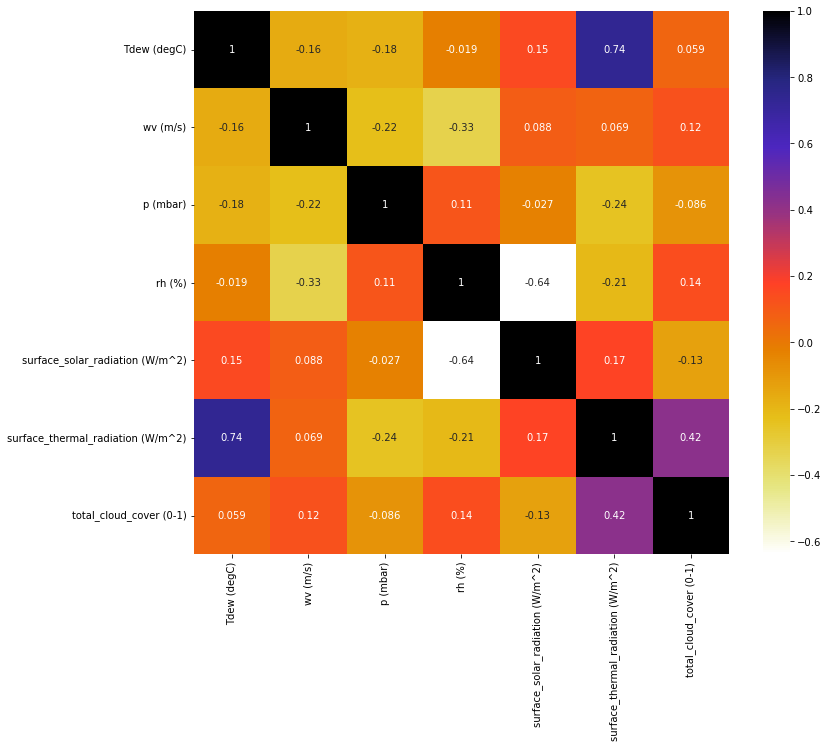

In [98]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [99]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [100]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [104]:
corr_features

{'surface_thermal_radiation (W/m^2)'}

In [107]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Date Time,Tdew (degC),wv (m/s),p (mbar),rh (%),surface_solar_radiation (W/m^2),total_cloud_cover (0-1)
18056,2012-01-23 08:00:00,13.24,3.64,1014.7970,0.37,375.16,0.08
42460,2014-11-05 04:00:00,5.70,6.28,1018.6499,0.52,939.86,0.09
84263,2019-08-12 23:00:00,8.16,3.74,1027.4522,0.92,79.63,0.99
18873,2012-02-26 09:00:00,17.97,5.18,1009.8084,0.51,48.26,0.38
46507,2015-04-22 19:00:00,12.35,3.99,1019.2115,0.94,0.00,0.97
...,...,...,...,...,...,...,...
72023,2018-03-20 23:00:00,9.39,6.48,1029.2606,0.61,298.42,0.63
88707,2020-02-14 03:00:00,20.13,2.69,1005.2056,0.66,748.87,0.86
79846,2019-02-09 22:00:00,9.26,4.28,1010.5431,0.69,187.06,0.98
78932,2019-01-02 20:00:00,13.17,2.77,1012.8436,0.86,36.03,0.50


In [109]:
X_train.shape, X_test.shape

((70039, 8), (30018, 8))

In [110]:
X_train.head()

,Date Time,Tdew (degC),wv (m/s),p (mbar),rh (%),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
38791,2014-06-05 07:00:00,7.78,1.85,1029.3323,0.76,40.16,321.99,0.57
50154,2015-09-21 18:00:00,6.14,5.57,1021.5849,0.90,0.00,286.64,0.64
95004,2020-11-02 12:00:00,13.54,1.82,1023.4005,0.83,0.00,315.45,0.09
53087,2016-01-21 23:00:00,15.55,2.09,1010.5825,0.85,175.63,382.96,1.00
19114,2012-03-07 10:00:00,11.71,5.59,1026.2196,0.74,0.00,381.52,0.97
